In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, ZeroPadding2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlxtend

## 配置gpu使用，防止gpu内存不够用报错
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [2]:
train_data_dir = './dog-cat-full-dataset-master/data/train'
test_data_dir = './dog-cat-full-dataset-master/data/test'

In [3]:
img_width = 32
img_heigh = 32
batch_size = 20

## ImageDataGenerator类的定义
```text
通过实时数据增强生成张量图像数据批次，并且可以循环迭代，
我们知道在Keras中，当数据量很多的时候我们需要使用model.fit_generator()方法，
该方法接受的第一个参数就是一个生成器。
简单来说就是：ImageDataGenerator()是keras.preprocessing.image模块中的图片生成器，
可以每一次给模型“喂”一个batch_size大小的样本数据，同时也可以在每一个批次中对这batch_size个样本数据进行增强，
扩充数据集大小，增强模型的泛化能力。比如进行旋转，变形，归一化等等。
```

In [4]:
datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = datagen.flow_from_directory(directory=train_data_dir, target_size=(img_width, img_heigh),
                                             classes=['dogs', 'cats'],
                                             class_mode='binary',
                                             batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [6]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir, target_size=(img_width, img_heigh),
                                                  classes=['dogs', 'cats'],
                                                  class_mode='binary',
                                                  batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [7]:
print(len(train_generator))
print(len(train_generator) * batch_size)

1000
20000


## BUILD BASE MODEL

In [8]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_heigh, 3),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose=1)

Epoch 1/5
1000/1000 [==============================] - 319s 319ms/step - loss: 0.6983 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 21s 21ms/step - loss: 0.6933 - accuracy: 0.5037 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 21s 21ms/step - loss: 0.6936 - accuracy: 0.4936 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 21s 21ms/step - loss: 0.6936 - accuracy: 0.4940 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 21s 21ms/step - loss: 0.6935 - accuracy: 0.5009 - val_loss: 0.6933 - val_accuracy: 0.5000


In [11]:
history.history

{'loss': [0.6982533997893333,
  0.6932976813316345,
  0.6935865831971169,
  0.6936096058487892,
  0.6935010712146759],
 'accuracy': [0.496, 0.5037, 0.49355, 0.494, 0.5009],
 'val_loss': [0.6931446461677552,
  0.6932619347572326,
  0.6935397393703461,
  0.6936463098526001,
  0.6933009648323059],
 'val_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5]}

In [12]:
def plot_learningCureve(history):
    epoch_range = range(1, 6)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

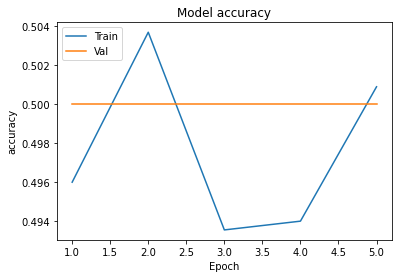

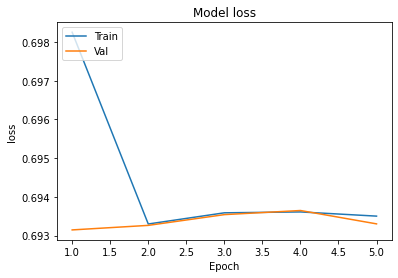

In [13]:
plot_learningCureve(history)

## Impliment First 3 blocks of vgg16 model  实现vgg16模型的前3个模块

In [14]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_heigh, 3),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose=1)

Epoch 1/5
1000/1000 [==============================] - 21s 21ms/step - loss: 0.7034 - accuracy: 0.5024 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 21s 21ms/step - loss: 0.6935 - accuracy: 0.4932 - val_loss: 0.6932 - val_accuracy: 0.5034
Epoch 3/5
1000/1000 [==============================] - 21s 21ms/step - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 21s 21ms/step - loss: 0.6935 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
 481/1000 [=============>................] - ETA: 8s - loss: 0.6933 - accuracy: 0.4965

KeyboardInterrupt: 

In [ ]:
plot_learningCureve(history)

## 为什么要加Batch Normalization
#### 随着网络的深度增加，每层特征值分布会逐渐的向激活函数的输出区间的上下两端（激活函数饱和区间）靠近，这样继续下去就会导致梯度消失。BN就是通过方法将该层特征值分布重新拉回标准正态分布，特征值将落在激活函数对于输入较为敏感的区间，输入的小变化可导致损失函数较大的变化，使得梯度变大，避免梯度消失，同时也可加快收敛。


In [17]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_heigh, 3),
                activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid'))

In [18]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose=1)

Epoch 1/5
1000/1000 [==============================] - 24s 24ms/step - loss: 0.6820 - accuracy: 0.6060 - val_loss: 0.5781 - val_accuracy: 0.7018
Epoch 2/5
1000/1000 [==============================] - 21s 21ms/step - loss: 0.6101 - accuracy: 0.6875 - val_loss: 0.5565 - val_accuracy: 0.7228
Epoch 3/5
1000/1000 [==============================] - 22s 22ms/step - loss: 0.5741 - accuracy: 0.7087 - val_loss: 0.5294 - val_accuracy: 0.7374
Epoch 4/5
1000/1000 [==============================] - 21s 21ms/step - loss: 0.5381 - accuracy: 0.7315 - val_loss: 0.5137 - val_accuracy: 0.7538
Epoch 5/5
1000/1000 [==============================] - 22s 22ms/step - loss: 0.5211 - accuracy: 0.7470 - val_loss: 0.5176 - val_accuracy: 0.7452


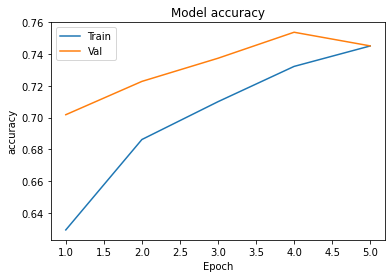

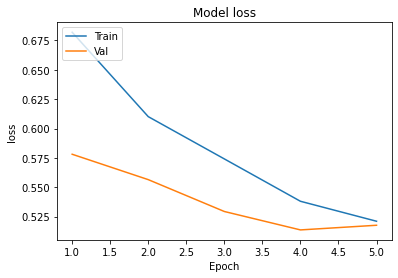

In [20]:
plot_learningCureve(history)